In [1]:
import numpy as np


In [2]:
np.quantile([1,2,3,4,5],.025)  #하위 2.5

1.1

In [3]:
import pandas 

In [4]:
sleep = pandas.read_csv('sleep.csv')

In [5]:
sleep.head()

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5


In [6]:
# 주피터 노트북이 돌아가는 폴더

In [7]:
import os

In [8]:
print(os.getcwd())

/Users/yeeun/Desktop/Yeeunhan/jupyter


# 선형모형

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model =  LinearRegression()

In [11]:
x = sleep[['group']]
y = sleep[['extra']]
model.fit(x,y)
# 둥근 괄호()는 함수에 쓰는 거기 때문에 여기서 쓰면 안됨. 그래서 틀렸음 
# 각괄호를 두번 치는 뜻 = 열이 하나만 있는 표 [] 하나 한거는 그냥 행의 모든 열들이 나옴

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
type(sleep['extra'])

pandas.core.series.Series

In [13]:
type(sleep[['extra']])

pandas.core.frame.DataFrame

# 로지스틱 선형모형

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model =LogisticRegression()

In [16]:
x = sleep[['extra']] #수면시간으로  [[]] 괄호가 두개 들어가는 이유는 표 형식이어야 해서! 
y = sleep[['group']] #그룹을 예측 : 그룹은 1번그룹 아님 2번그룹 (0-1 사이 이기 떄문에 로지스틱 선형모형으로 예측)
model.fit(x,y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
model.coef_ #수면시간이 늘어날 수록 1번 그룹보다는 2번 그룹일 확률이 커진다 

array([[0.38870779]])

In [18]:
sleep.groupby('group').agg({'extra':np.mean}) #group으로 그룹바이해서 extra 평균 보던 2번 그룹이 평균적으로 더 많이 잔다는 것을 알 수 있다. 

,extra
group,
1,0.75
2,2.33


## 실습 : 위의 로지스틱 선형 모형의 계수(coef_)의 95% 신뢰구간

In [19]:
x = sleep[['extra']] #수면시간으로  [[]] 괄호가 두개 들어가는 이유는 표 형식이어야 해서! 
y = sleep[['group']] #그룹을 예측 : 그룹은 1번그룹 아님 2번그룹 (0-1 사이 이기 떄문에 로지스틱 선형모형으로 예측)
model.fit(x,y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
import seaborn

In [122]:
from sklearn.utils import resample

In [123]:
model.coef_

array([[0.38870779]])

In [131]:
coefs= []
for _ in range(10000):
    df = resample(sleep) # 샘플링
    model = LogisticRegression(solver = 'lbfgs')   #모형만들기 (solver='1bfgs') 이거 안쓰면 퓨쳐워닝 만개 뜸
    model.fit(df[['extra']] ,df['group'])      # 로지스틱 선형 모형은 종속 변수가 하나면 되니까 각 그룹 구대는 extra만 해주기 
    coefs.append(model.coef_)     #추정한 계수를 리스트에 추가 
    

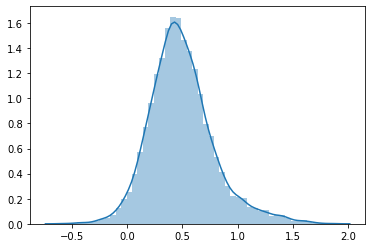

In [134]:
seaborn.distplot(coefs)

In [133]:
np.quantile(coefs,[.025,.975]) 
# 계수가 +- 걸쳐있네,,,, 신뢰구간의 정확성이 떨어진다. 그래서 위에 냈던 결론: 수면시간이 길어지면 2번그룹이다 가 아니라 2번일수도 있고 아닐수도 있다
# 결론이 안 남. 샘플을 더 모아야 한다. 

array([-0.01322348,  1.21707773])

# 실험 (통계5) : 두 집단의 평균 차이 
## 두 그룹의 수면 시간 차이

In [141]:
stat = sleep.groupby('group').mean() 
# 2번 그룹의 평균적으로 1.58시간 더 많이 잠. 근데 이게 우리가 가진 샘플이 실제로 이렇게 차이가 난다는 뜻일까? -> 평균 차이의 신뢰구간을 구해보자 

In [137]:
2.33 - 0.75 # 2번 그룹 평균 - 1번 그룹 평균 

1.58

In [142]:
stat.loc[1,'extra'] # loc = location: 특정 컬럼의 위치 = 1번 행의 extra 컬럼

0.75

In [143]:
stat.loc[2,'extra']

2.3299999999999996

In [147]:
diff = stat.loc[2,'extra'] - stat.loc[1,'extra']

In [165]:
sleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [150]:
s=resample(sleep['extra'])

pandas에 loc과 iloc 존재 
loc : 이름으로 위치를 지정 # s.loc -> s의 구번째 데이터 (위치)
iloc: -번째로 위치를 지정 # s.iloc -> s의 9번 숫자 (이름)

In [156]:
s.iloc[0:10] #iloc 앞에서 10명 -> 원래 데이터가 범위가 10이니까 범위를 10으로 지정해준거임. 

5     3.4
8     0.0
13    0.1
9     2.0
19    3.4
5     3.4
16    5.5
3    -1.2
11    0.8
8     0.0
Name: extra, dtype: float64

In [157]:
s.iloc[10:20] # extra에 있던 두 집단을 무작위로 섞은 후 반반으로 나눔(두 집단으로 나눔)

16    5.5
7     0.8
16    5.5
16    5.5
12    1.1
11    0.8
2    -0.2
0     0.7
6     3.7
7     0.8
Name: extra, dtype: float64

In [158]:
d = s.iloc[0:10].mean() - s.iloc[10:20].mean()

In [159]:
d #무작위로 나눈 두 집단의 평균의 차이 

-0.6799999999999997

In [160]:
#신뢰구간 만들기
diffs = []
for _ in range(30000):
    s = resample(sleep['extra'])
    d = s.iloc[0:10].mean() - s.iloc[10:20].mean()
    diffs.append(d)

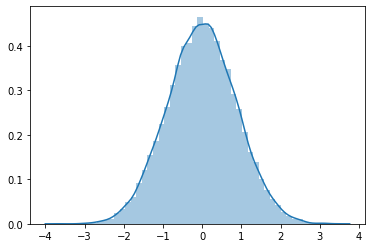

In [162]:
seaborn.distplot(diffs) #무조건 좌우대칭으로 나옴 

In [163]:
np.quantile(diffs,[.025,.975]) #무작위로 섞어서 반으로 나누어도, -1.72에서 1.71정도는 95% 안에서 나올 수 있다 

array([-1.72   ,  1.71025])

In [164]:
diff #우리 실험 결과는 1.57 밖에 안 됨 (위에서 구한 두 그룹의 평균) = 이 정도는 무작위로 나누어도 나온다 

1.5799999999999996

- 실제 실험: 무작위로 나눈다 → 조건마다 다르게 → 차이를 구함 (1.53정도 나옴)

- 분석 가정 : 정말로 조건마다 다를까..? 

- 가정: 무작위로 나눈다 → 조건마다 다르게 안해버림  그냥 반으로 나누기 (무작위로 둘로 나누기) 다이렉트로 차이 구해버리기 

        그리고 그 무작위로 나눈 두 집단의 평균 차이 구하기 (+- 1.73정도 나옴) 

- → 아무것도 안해도 그냥 1.73정도 차이는 나옴. 그러니까 실제 실험이 형편없는 결과. 그냥 사람들을 나누어도 나오는 차이. 그니까 '조건마다 다르게'가 의미가 없음. 가정의 결과보다는 더 커야 함. = 조건마다 다르다고 안 봄. 똑같네 ㅎ 조건이 결과에 영향을 미치지 않는다.

# 양방검증

In [ ]:
np.quantile(diffs,.095)

# 단방검증

# 신뢰 수준과 유의 수준

In [168]:
np.quantile(diffs, [.025,.975]) #95%의 신뢰구간 = 신뢰 수준이 95% = 유의수준 5% (1종 오류가 5% 나오는 걸 감수한다)

array([-1.72, -1.29])

In [171]:
np.quantile(diffs, [.005,.995]) #99% 신뢰구간 = 유의수준 1% (1종 오류가 1% 나오는 걸 감수한다)-> 차이 2.2를 넘겨야 하니까 더 힘들어짐,,, 

array([-2.23,  2.25])

In [ ]:
#신뢰수준을 높이면(유의수준을 낮추면) 신뢰구간 범위가 넒어지니까 그만큼 기준을 만족시키기가 어려움.

# 통계5 _ 에타제곱

In [20]:
전체평균 = sleep['extra'].mean()

In [21]:
X = sleep['extra']

In [23]:
import numpy as np

In [24]:
전체SS= np.sum((X-전체평균)**2)

In [35]:
sleep.groupby('group').agg({'extra':'mean'})  # 'mean'에 'sum'이나 'median'값을 넣어주면 그렇게 구해줌 원래는 np.mean 이렇게 써도됨
#sleep을 group 변수에 따라(by) 그룹을 지어
#extra 컬럼을 평균(mean)내라는 뜻 

,extra
group,
1,0.75
2,2.33


In [32]:
처치SS= ( #보통 처치 라고 하는 데(그룹간의 처치) 근데 그룹ss 라고 해도 됨. =treatment 
    10*(0.75-전체평균)**2+      #1번 그룹의 10명의 사람 (개인 차 무시, 집단 간의 차이(0.75)만 존재) 
    10*(2.33 - 전체평균)**2)    #2번 그룹의 10명의 사람 

In [30]:
에타제곱 = 처치SS/전체SS 

In [31]:
에타제곱 # 집단 간 차이가 수면시간의 16.1%를 설명한다. (16% -> 마일드한 숫자 )

0.16133285079102466

### 결론 : 
- 개인차: 집단 간 차이 (16%) 이면 + 집단 내 차이는 84% 이다. 그러니까 결국 집단 간 차이는 베게의 차이(우리 회사 베게를 썼냐 안 썻냐) 그리고 84%는 그냥 순수한 개인 차(사람마다 잠을 잘 자거나 못 자는 차이) 

## 코헨의 d : 두 집단의 평균차이 를 데이터의 표준 편차로 나눈 것 

In [36]:
코헨의d = (2.33 - 0.75)/sleep['extra'].std() # 두 집단의 평균차이 를 데이터의 표준 편차로 나눈 것 # std: 표준편차

In [37]:
코헨의d # 두 집단이 0.78 표준편차 차이가 난다. -> 감이 잘 안 올때? 그럼 그나마 익숙한 IQ 표준편차로 비교해보자 (1표준편차 = 15점)

0.7829845675400594

In [38]:
15 * 0.78 # 아이큐 11점의 차이.(그래서 15 곱함) 그러면 약간 엄청 차이는 안나는 데 그래도 더 나은 정도..? 

11.700000000000001

# 입실론_그리디

In [40]:
from numpy.random import normal

In [41]:
a = normal(10,1,1000) # 평균 10 = 가치, 표준편차 1, 데이터 1000개

In [42]:
b = normal(9,1,1000) #평균 9

In [48]:
epsilon = 0.1 #(10%)

In [45]:
from numpy.random import uniform

In [50]:
import random

In [56]:
count = {'A':0, 'B':0}
reward =  {'A':0, 'B':10}
value =  {'A':0, 'B':0}

for _ in range(1000):
    if uniform(0,1)< epsilon: # 실험
        if random.choice('AB') == 'A':
            reward['A'] += normal(10,1)
            count['A'] += 1
            value['A'] = reward['A']/count['A']
            print('A')
        else: # 활용
            reward['B'] += normal(9,1)
            count['B'] += 1
            value['B'] = reward['B']/count['B']
            print('B')
    else:
        if  value['A'] >  value['B']:
            reward['A'] += normal(10,1)
            count['A'] += 1
            value['A'] = reward['A']/count['A']
            print('A')
        else:
            # 활용
            reward['B'] += normal(9,1)
            count['B'] += 1
            value['B'] = reward['B']/count['B']
            print('B')
# 이렇게해서 돌려보면 초반에는 b를 많이하지만 결국에는 데이터가 많이 쌓이면 더 가치가 높은 a를 많이 하기 때문에 장기적으로 a가 많이 나옴
# reward b를 10으로 고쳐도 똑같음 

B
B
B
B
B
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
B
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
B
A
A
A
B
B
A
A
A
B
A
A
B
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
B
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A


In [ ]:
# 코드 정리 한 버전  놓침... 이거랑 이동평균 코드는 선생님꺼 보고 구하자! 
count = {'A':0, 'B':0}
reward =  {'A':0, 'B':10}
value =  {'A':0, 'B':0}
real = {'A':10, 'B':9}

for _ in range(1000):
    if uniform(0,1)< epsilon: # 실험
        if random.choice('AB') == 'A':
            s = random.choice('AB')
        else: # 활용
            if value['A'] > value['B']:
                s = 'A'
            else:
                s = 'B'
    reward = normal(real[selected], 1)